# AIDO LUTHFI AL HAKIM / 3A TI / 2141720136

## Import library yang dibutuhkan:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import MiniBatchKMeans
import glob

library MiniBatchKMeans akan digunakan untuk klastering KMeans.

## Import gambar dari data yang sudah disediakan:

In [2]:
images = []
for img in glob.glob("dummy/*"):
    n= cv2.imread(img)
    images.append(n)

digunakan library glob untuk memuat semua file yang ada di dalam folder dummy sebagai gambar pada koleksi images.

## Methods untuk klustering dan penampilan data:

In [3]:
def scale_data(img): 
    h, w, ch= img.shape
    data = img / 255.0 #digunakan untuk merubah gambar dari 0-255 menjadi 0-1
    data = data.reshape(h * w, ch) #kemudian dirubah menjadi(w*h,color)
    return data


def plot_pixels_3d(data, title, colors=None, N=10000, ax=None): #untuk menampilkan warna dalam gambar berupa plot3d
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    ax.scatter(R, G, B, c=colors, marker='.')
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(title, size=14)

def img_comparison(original, new_colors): #untuk menampilkan gambar asli dan hasil klustering
    new_plate = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16);

def kmeans_cluster(original): # main methode, untuk menjalankan program klustering k-means
    data = scale_data(original) #pertama gambar inputan akan discaling/normalisasi menjadi range 0-1 dan shape
    kmeans = MiniBatchKMeans(2,n_init=3) #pembuatan model Mini Batch KMeans dengan nilai K = 2 (n_init hanya untuk supress warning)
    kmeans.fit(data) #kemudian dilakukan training terhadap data inputan
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)] #prediksi nilai klustering
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'}) #plot untuk menampilkan grafik 3d warna

    plot_pixels_3d(data, "16 million possible colors", ax=ax1) #tampilkan grafik 3d warna asli
    plot_pixels_3d(data, "2 colors", colors=new_colors, ax=ax2) #tampilkan grafik 3d warna hasil clustering
    plt.show()
    
    img_comparison(original, new_colors) #menampilkan gambar original dan hasil clustering
    
    

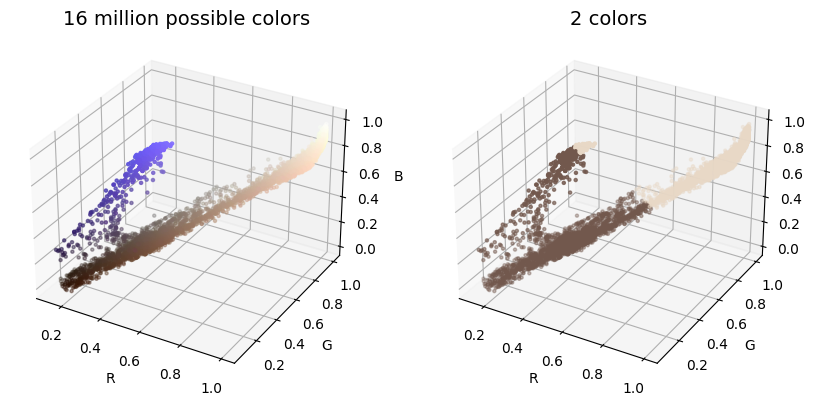

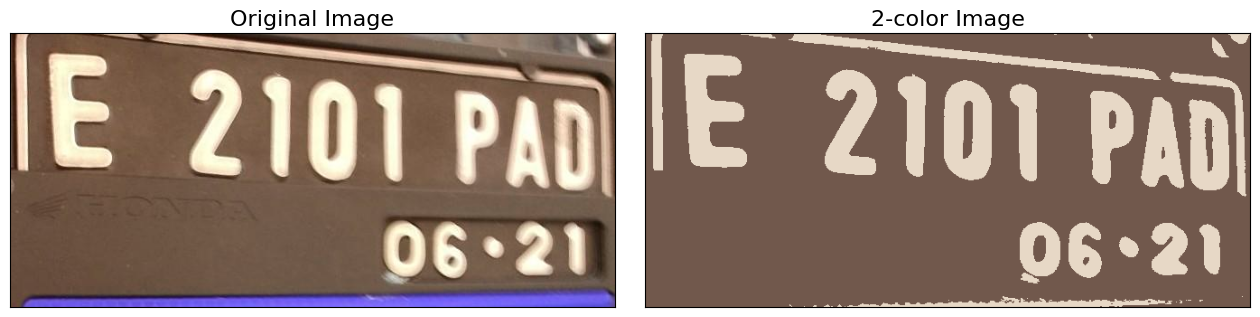

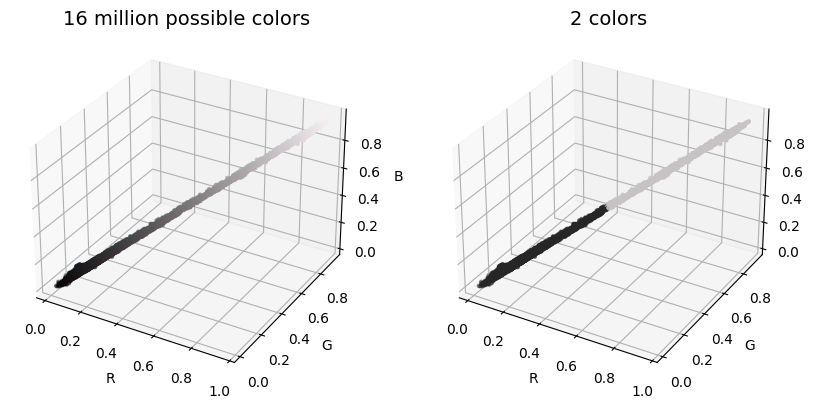

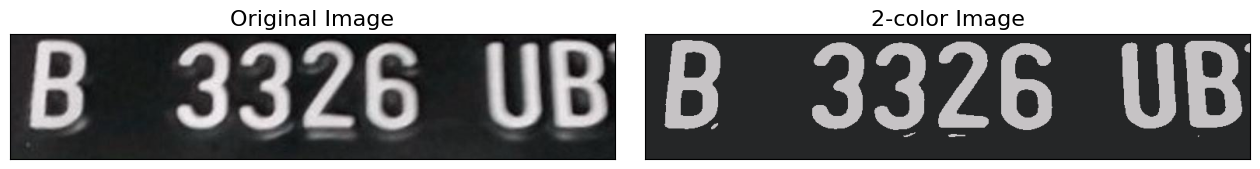

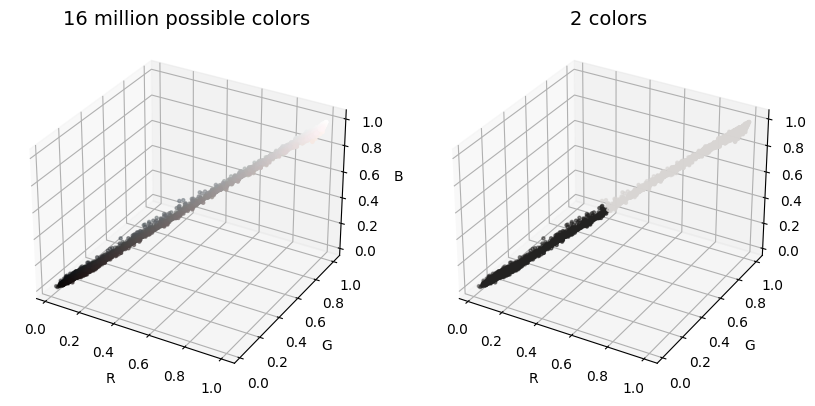

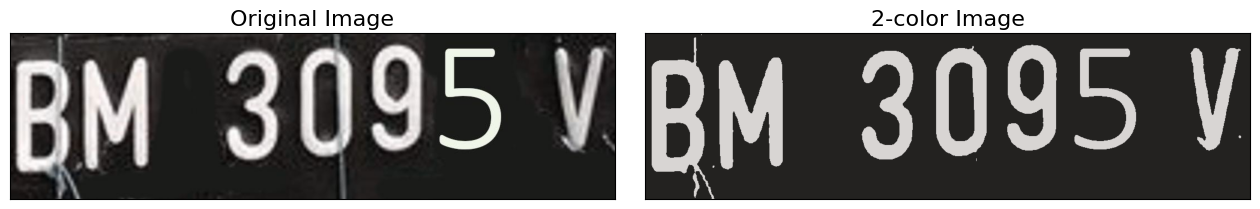

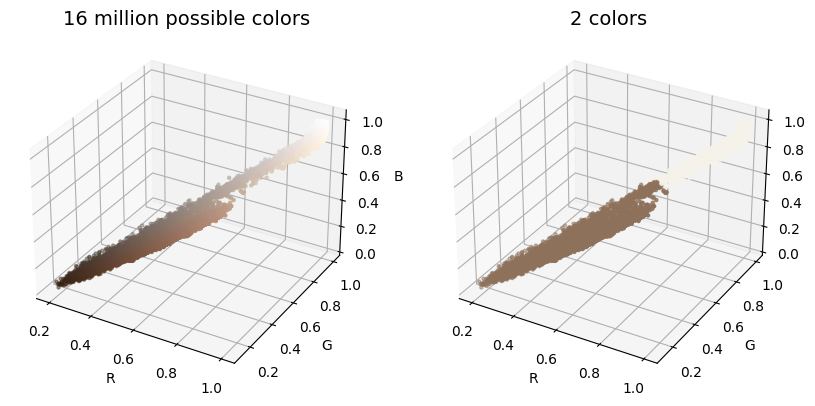

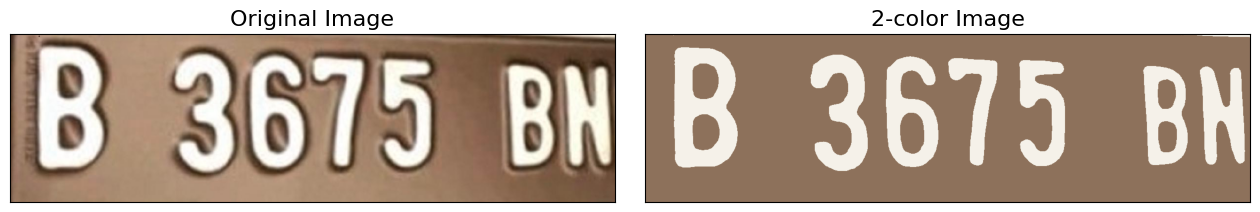

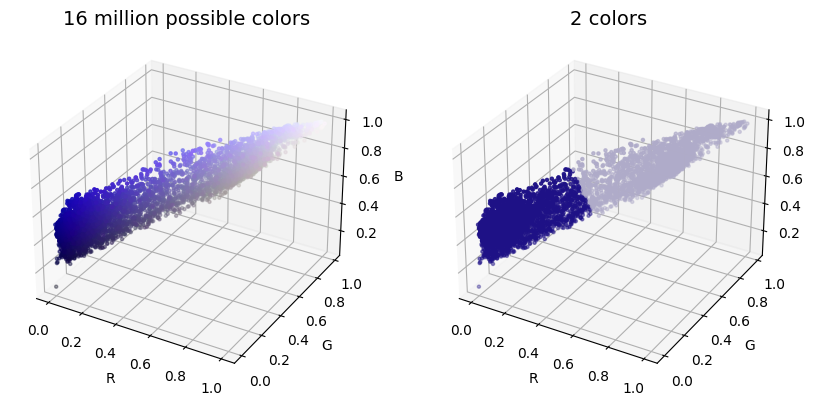

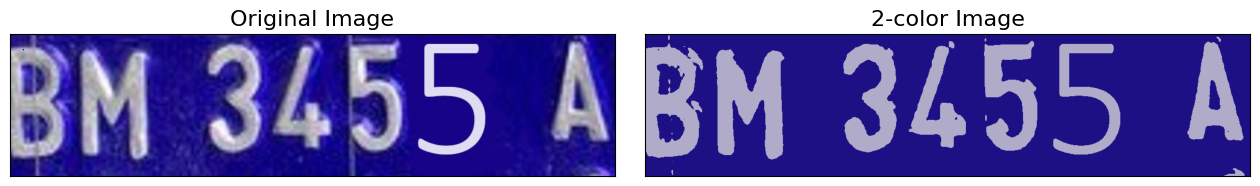

In [4]:
dataset = [10,20,30,41,9] #pilih index gambar mana saja yg mau di kluster
for data in dataset: #iterasi untuk clustering dengan k-means
    kmeans_cluster(images[data])